In [6]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import random
import os
import pytesseract
import cv2

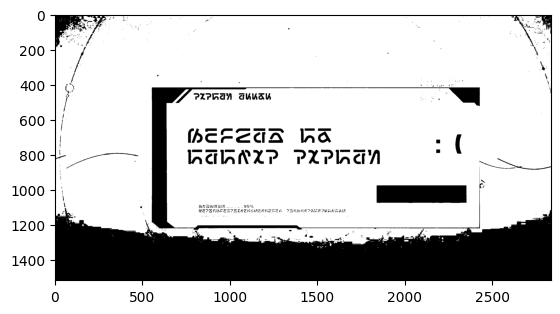

In [20]:
test_image = "images/test_screenshot_2.png"

# Thresholding with opencv
img = cv2.imread(test_image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite("images/thresh.png", thresh)
plt.imshow(thresh, cmap='gray')

In [18]:
# convert to PIL image
pil_thresh = Image.fromarray(thresh)

tessdata_config = '--tessdata-dir /Users/austringer/Workspace/my-repo/solaris3-ocr/tesstrain/data'

print(pytesseract.image_to_string(pil_thresh, lang='Solaris-3', config=tessdata_config))

system error

failed to
tethyvs

ibhayxfmarfn.
qbasagrrhiau isaviansmankaras sadrfrhsxtuhkorthtrm

